# Training Models

* linear regression Models
    * direct "closed-form" equation
    * Gradient Descent (GD)

* polynomial regression (for nonlinear datasets)
    * overfitting
    * learning curves
    * regularization

* logistic regression

* softmax regression

# Linear Regression

A linear model makes a prediction by computing a weighted sum of the input features, plus a constant called the bias term (the intercept term).

* linear regression model prediction : $y = \theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_nx_n$
    * $y$ is the predicted value
    * _n_ is the number of features
    * $x_i$ is the i_th feature value
    * $\theta_j$ is the j_th model parameter (including the bias term $\theta_0$ and the feature weights $\theta_1$, $\theta_2$, ..., $\theta_n$).

* ...or, in vectorized form : $y = h_\theta(X) = \Theta.X$
    * **_$\Theta$_** is the model's **_parameter vector_**, including the bias term $\theta_0$ and the feature weightes $\theta_1$ to $\theta_n$
    * **_X_** is the instance's **_feature vector_**, including $x_0$ to $x_n$ with $x_0$=1 
    * **_$\Theta$.x_** is the **_dot product_** of the two vectors (NOT the multiplication of the two vectors!), i.e., $\theta_0x_0 + \theta_1x_1 + \theta_2x_2 + \theta_nx_n$
    * **__$h_\theta$__** is the **_hypothesis function_**, using the model parameters **_$\Theta$_**

To train a linear regression model is to find the value of $\Theta$ (parameter vector) that minimize the **_Root Mean Squared Error (RMSE)_**.

Mean Squared Error (MSE) cost function : MSE(X, **__$h_\theta$__**), or, MSE($\Theta$)

In [1]:
# set up code

# check if python >= 3.5 
import sys
assert sys.version_info >= (3, 5)

# check if scikit-learn is >= 0.20
import sklearn
assert sklearn.__version__ >= '0.20'

# common imports
import numpy as np
import os

# set a fixed random seed
np.random.seed(42)

# plot pretty figures
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# save figure
PROJECT_ROOT_DIR = '.'
CHAPTER_ID = 'training_linear_models'
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, 'images', CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# ignore warnings
import warnings
warnings.filterwarnings(action='ignore', message='^internal gelsd')

# normal equation

In [2]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Saving figure generated_data_plot


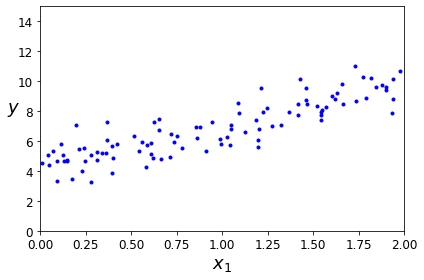

In [3]:
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig('generated_data_plot')
plt.show()

## manually calculate theta_best using normal equation and make a prediction

In [4]:
# add x0=1 to each instance
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.21509616],
       [2.77011339]])

In [5]:
# make prediction using theta_best
X_new = np.array([[0], [2]])
# add x0=1 to each instance
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict


array([[4.21509616],
       [9.75532293]])

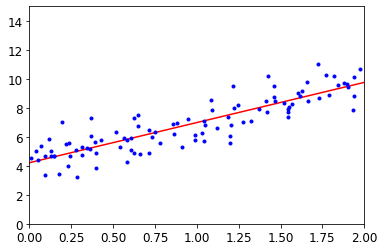

In [6]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

Saving figure linear_model_predictions_plot


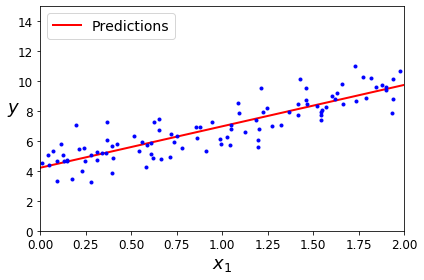

In [7]:

plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
save_fig("linear_model_predictions_plot")
plt.show()

## perform the same linear regression using scikit-learn

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

intercept   = lin_reg.intercept_
coefficient = lin_reg.coef_
prediction  = lin_reg.predict(X_new)

print('the intercept is',   '\t:', intercept)
print('the coefficient is', '\t:', coefficient)
print('the prediction is:', '\n')
print(prediction)


the intercept is 	: [4.21509616]
the coefficient is 	: [[2.77011339]]
the prediction is: 

[[4.21509616]
 [9.75532293]]


## call scipy.linalg.lstsq() function

In [9]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [10]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

## computational complexity

# Gradient Descent

* the general idea: tweak parameters iteratively to minimize a cost function

* It measures the local gradient of the error function with regard to the parameter vector $\Theta$, and it goes in the direction of descending gradient until it reaches zero. 

* It ususally starts by filling $\Theta$ with random values (randomzied initialization). It will be improved gradually, with each step attempting to decrease the cost function (e.g., the MSE), until the algorithm converges to a minimum. 

* The learning step size, or the **_learning rate_** hyperparameter, is proportional to the slope of the cost function, so the steps gradually get smaller.

* cost fuctions may have irregular shapes as compared to a bowl shape, i.e., it may have local minimum and plateau. 

* Small learing rate will take many iterations to converge, whereas large learning rate may risk jumpping over the converge point. 

* the MSE cost function for linear regression model is a **_convex function_** which guarantees a global minimum. 

* scales of the features in trainning data set may affect gradient descent. So, similar scales of the features obtained through Scikit-Learn's **_StandardScaler_** class are preferred.  

* training a model means searching through the **_parameter space_** to minimize a cost function. 

## Batch Gradient Descent

* can use **_grid search_** to find a good learning rate (ref Chp2)
* set a very large num of iteration, but stop the algorithm when gradient vector becomes tiny, i.e., < **_tolerance_** value. 

In [11]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # initiate random parameters

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients


In [12]:
theta

array([[4.21509616],
       [2.77011339]])

In [13]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, 'b.')
    n_iterations = 1000
    for interation in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = 'b-' if iteration > 0 else 'r--'
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel('$x_1$', fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

Saving figure gradient_descend_plot


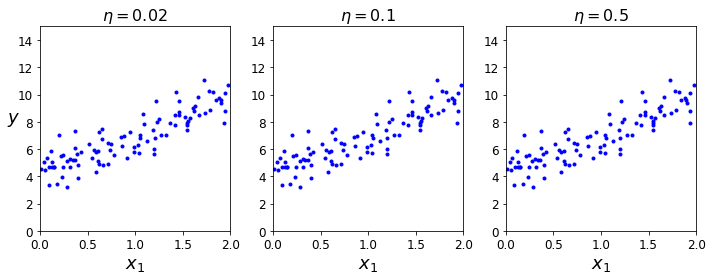

In [14]:
np.random.seed(42)
theta = np.random.randn(2,1)

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig('gradient_descend_plot')
plt.show()

# stochastic gradient descent

In [15]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

]
epoch 45
theta: 
 [[4.23647433]
 [2.74174521]]
epoch 45
theta: 
 [[4.23728642]
 [2.74273897]]
epoch 45
theta: 
 [[4.23414075]
 [2.74148878]]
epoch 45
theta: 
 [[4.23593273]
 [2.7421461 ]]
epoch 45
theta: 
 [[4.23348721]
 [2.74192489]]
epoch 45
theta: 
 [[4.23773404]
 [2.74708517]]
epoch 45
theta: 
 [[4.23523796]
 [2.74461316]]
epoch 45
theta: 
 [[4.23627048]
 [2.74629712]]
epoch 45
theta: 
 [[4.23632408]
 [2.7463154 ]]
epoch 45
theta: 
 [[4.23387953]
 [2.74609428]]
epoch 45
theta: 
 [[4.23425392]
 [2.74680479]]
epoch 45
theta: 
 [[4.23266128]
 [2.74489007]]
epoch 45
theta: 
 [[4.23713289]
 [2.75260899]]
epoch 45
theta: 
 [[4.23861727]
 [2.7526701 ]]
epoch 45
theta: 
 [[4.23687084]
 [2.75094535]]
epoch 45
theta: 
 [[4.2360391 ]
 [2.74976747]]
epoch 45
theta: 
 [[4.2375771 ]
 [2.75076774]]
epoch 45
theta: 
 [[4.23587961]
 [2.74973484]]
epoch 45
theta: 
 [[4.23663403]
 [2.75094523]]
epoch 45
theta: 
 [[4.23366367]
 [2.74785566]]
epoch 45
theta: 
 [[4.232783  ]
 [2.74649039]]
epoch 45
th

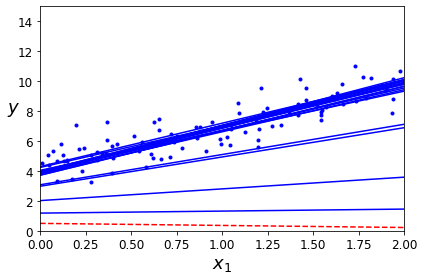

In [16]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = 'b-' if i > 0 else 'r--'
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index+1]
        yi = y[random_index : random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)
        print('epoch', epoch)
        print('theta:', '\n', theta)

plt.plot(X, y, 'b.')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([0,2,0,15])
save_fig('sgd_plot')
plt.show()

In [17]:
print('theta is:')
print(theta)

theta is:
[[4.21076011]
 [2.74856079]]


## implementing SGD via scikit-learn

In [18]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [19]:
print('sgd reg intercept:', '\t', sgd_reg.intercept_)
print('sgd reg coefficient:', '\t', sgd_reg.coef_)


sgd reg intercept: 	 [4.23868557]
sgd reg coefficient: 	 [2.82181634]


## mini-batch gradient descent

In [20]:
theta_path_mgd = []
n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0

for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled   = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i : i+minibatch_size]
        yi = y_shuffled[i : i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [21]:
theta

array([[4.25214635],
       [2.7896408 ]])

In [22]:
theta_path_bgd_array = np.array(theta_path_bgd)
theta_path_sgd_array = np.array(theta_path_sgd)
theta_path_mgd_array = np.array(theta_path_mgd)

Saving figure gradient_descent_paths_plot


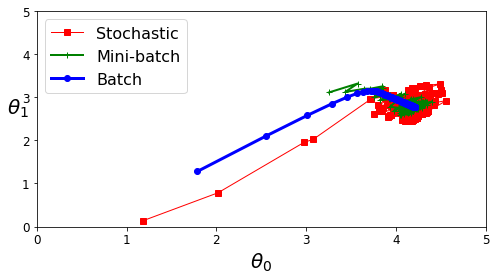

In [23]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd_array[:, 0], theta_path_sgd_array[:, 1], 'r-s', linewidth=1, label='Stochastic')
plt.plot(theta_path_mgd_array[:, 0], theta_path_mgd_array[:, 1], 'g-+', linewidth=2, label='Mini-batch')
plt.plot(theta_path_bgd_array[:, 0], theta_path_bgd_array[:, 1], 'b-o', linewidth=3, label='Batch')
plt.legend(loc='upper left', fontsize=16)
plt.xlabel(r'$\theta_0$', fontsize=20)
plt.ylabel(r'$\theta_1$', fontsize=20, rotation=0)
plt.axis([0, 5, 0, 5])
save_fig('gradient_descent_paths_plot')
plt.show()

## polynomial regression

In [24]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [25]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

Saving figure quadratic_data_plot


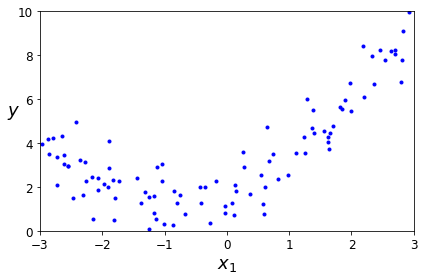

In [26]:
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig('quadratic_data_plot')
plt.show()

In [27]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [28]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [29]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_ 

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

Saving figure quadratic_predictions_plot


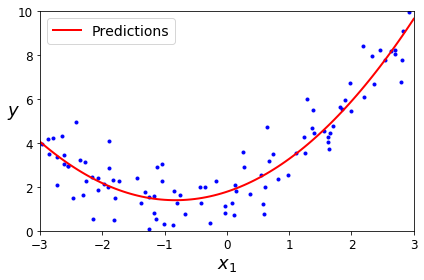

In [30]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, 'b.')
plt.plot(X_new, y_new, 'r-', linewidth=2, label='Predictions')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.legend(loc='upper left', fontsize=14)
plt.axis([-3, 3, 0, 10])
save_fig('quadratic_predictions_plot')
plt.show()

## learning curves

Saving figure high_degree_polynomials_plot


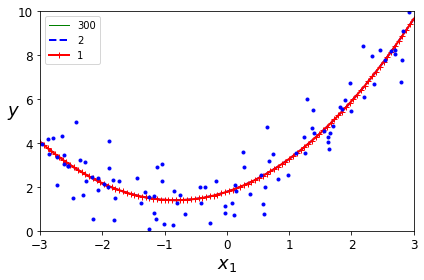

In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (('g-', 1, 300), ('b--', 2, 2), ('r-+', 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
                                        ('poly_features', poly_features), 
                                        ('std_scaler', std_scaler), 
                                        ('lin_reg', lin_reg),
                                     ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, 'b.', linewidth=3)
plt.legend(loc='upper left')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig('high_degree_polynomials_plot')
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
    plt.legend(loc='upper right', fontsize=14)
    plt.xlabel('training set size', fontsize=14)
    plt.ylabel('RMSE', fontsize=14)

Saving figure underfitting_learning_curves_plot


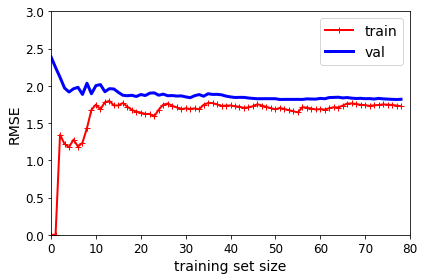

In [33]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
save_fig('underfitting_learning_curves_plot')
plt.show()

Saving figure learning_curves_plot


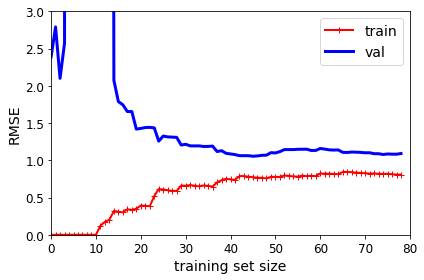

In [34]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
save_fig('learning_curves_plot')
plt.show()

# regularized linear model

* to reduce overfitting, regularize the model, i.e., to constrain the degrees of freedom.

## ridge regression

In [35]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [36]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky', random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [37]:
ridge_reg = Ridge(alpha=1, solver='sag', random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

Saving figure ridge_regression_plot


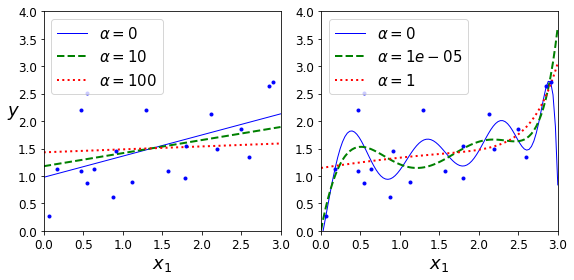

In [38]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ('b-', 'g--', 'r:')):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                              ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                              ("std_scaler", StandardScaler()),
                              ("regul_reg", model), 
                            ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, 'b.', linewidth=3)
    plt.legend(loc='upper left', fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8, 4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

save_fig("ridge_regression_plot")
plt.show()


In [39]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

## lasso regression

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.802867703827423, tolerance: 0.0009294783355207351
  positive)
Saving figure lasso_regression_plot


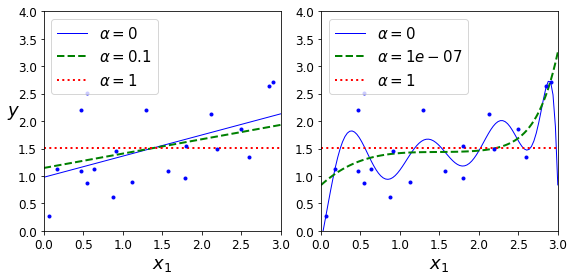

In [40]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8, 4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

save_fig("lasso_regression_plot")
plt.show()

In [41]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

## Elastic Net

In [42]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

In [43]:
np.random.seed(42)
m = 100
X = 6 * np.random.randn(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

## Early Stopping

In [44]:
from sklearn.base import clone

poly_scaler = Pipeline([
                        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
                        ("std_scaler", StandardScaler())
                      ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

Saving figure early_stopping_plot


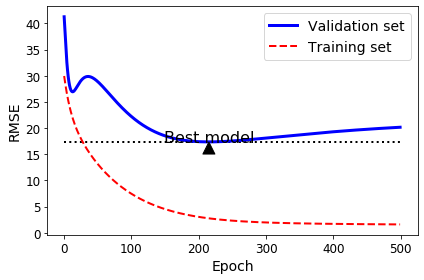

In [45]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [ ], [ ]

for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             ha='center',
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,)

best_val_rmse -= 0.03
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='Validation set')
plt.plot(np.sqrt(train_errors), 'r--', linewidth=2, label='Training set')
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
save_fig('early_stopping_plot')
plt.show()

In [46]:
best_epoch, best_model

(215,
 SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
              eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
              learning_rate='constant', loss='squared_loss', max_iter=1,
              n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
              shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
              warm_start=True))

## Lasso vs. Ridge regularization

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [49]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])


Saving figure lasso_ridge_plot


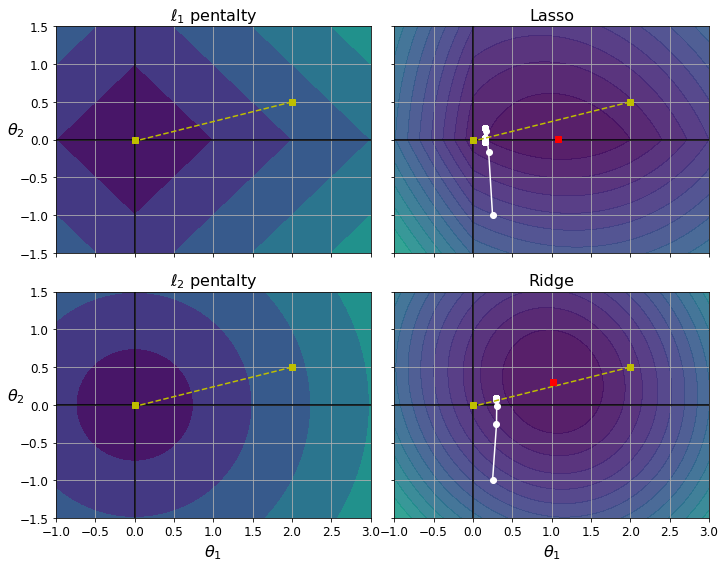

In [54]:
def bdg_path(theta, X, y, l1, l2, core = 1, eta = 0.05, n_iterations = 200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) -  y) + l1 * np.sign(theta) + 12 * theta
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))

for i, N, l1, l2, title in ((0, N1, 2., 0, "Lasso"), (1, N2, 0, 2., "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2**2

    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ  = (np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR = (np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN  = np.linspace(0, np.max(N), 10)

    path_J = bdg_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bdg_path(t_init, Xr, yr, l1, l2)
    path_N = bdg_path(np.array([[2.0], [0.5]]), Xr, yr, np.sign(11)/3, np.sign(12), core=0)

    ax = axes[i, 0]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, N / 2., levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], 'y--')
    ax.plot(0, 0, 'ys')
    ax.plot(t1_min, t2_min, 'ys')
    ax.set_title(r"$\ell_{}$ pentalty".format(i + 1), fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)
    ax.set_ylabel(r"$\theta_2$", fontsize=16, rotation=0)

    ax = axes[i, 1]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], 'w-o')
    ax.plot(path_N[:, 0], path_N[:, 1], 'y--')
    ax.plot(0, 0, 'ys')
    ax.plot(t1_min, t2_min, 'ys')
    ax.plot(t1r_min, t2r_min, 'rs')
    ax.set_title(title, fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)

save_fig('lasso_ridge_plot')
plt.show()